<center><h1>Making Merger Tree from m3p output</h1></center>

In [30]:
import numpy as np
import m3p_merger
import matplotlib.pyplot as plt
import importlib
importlib.reload(m3p_merger)

<module 'm3p_merger' from '/usr/users/ellis/jupyterhub-gwdg/PeakPatch/m3p_merger/m3p_merger.py'>

In [31]:
# Peak patch data
pathPrefix = "/usr/users/ellis/PeakPatch/m3p/axOut/"

# Unevolved Density fields
DensPath = "/usr/users/ellis/bin/InputFiles/512"
DensSuffix = ['/L6N3_07/axion.m.00115_L6N3_07','/L6N3_06/axion.m.00115_L6N3_06','/L6N3_01/axion.m.00115_L6N3_01']

In [32]:
ppFile = pathPrefix + "../inputs/inputs.ax_manyz"
densFile = DensPath+DensSuffix[0]

peak_list, boxsize = m3p_merger.MakePeakList(ppFile)

<h2><center>Find which trees are interesting</center></h2>

In [ ]:
for i in range(452):
    out = m3p_merger.BuildMergerTree(peak_list, ppFile, i)
    if out[10].size>0:
        print(i, len(out[4]))

1 1
3 1
9 1
11 1
16 1
17 1
21 1
23 2
27 1
32 1
33 1
36 5
39 1
40 3
41 2
43 1
45 1
48 1
49 2
50 1
52 1
58 2
61 1
64 1
66 1


<h2><center>Calculate Merger Tree</center></h2>

In [33]:
out = m3p_merger.BuildMergerTree(peak_list, ppFile, 49)

<h2><center>Plot all peaks on each other</center></h2>

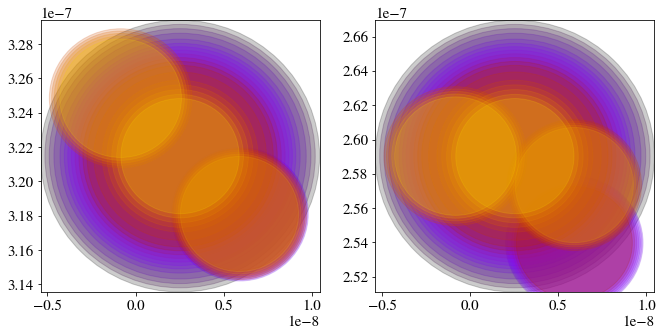

In [34]:
importlib.reload(m3p_merger)
m3p_merger.plotMergerPatches(out, ppFile)

<h2><center>Plot merger tree</center></h2>

Collapse redshift: 3574.0


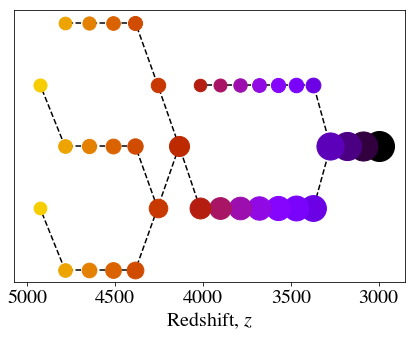

In [35]:
importlib.reload(m3p_merger)
m3p_merger.plotMergerTree(out, ppFile, font_size = 20)
print("Collapse redshift: {}".format(m3p_merger.FindCollapseRedshift(out, 0.1, ppFile)));

<h2><center>Calculate all collapse redshifts</center></h2>

In [37]:
import time

totalPeaks = len(peak_list[0].T)
collapse_redshifts = np.zeros(totalPeaks)

tic = time.time()
for i in range(totalPeaks):
    out = m3p_merger.BuildMergerTree(peak_list, ppFile, i)
    collapse_redshifts[i] = m3p_merger.FindCollapseRedshift(out, 0.1, ppFile)
    if i % 100 == 0:
        toc = time.time()
        timeSoFar = toc-tic # seconds
        averageTimeForOne = i/timeSoFar
        predictedTimeLeft = (totalPeaks-i)*averageTimeForOne
        print("{}/{} complete.\nEstimated time remaining: {:.3} hours.\n".format(i, totalPeaks, predictedTimeLeft/60**2))

0/20210 complete.
Estimated time remaining: 0.0 hours.

100/20210 complete.
Estimated time remaining: 11.3 hours.

200/20210 complete.
Estimated time remaining: 11.3 hours.

300/20210 complete.
Estimated time remaining: 10.6 hours.

400/20210 complete.
Estimated time remaining: 10.8 hours.

500/20210 complete.
Estimated time remaining: 10.8 hours.

600/20210 complete.
Estimated time remaining: 10.8 hours.

700/20210 complete.
Estimated time remaining: 10.6 hours.

1600/20210 complete.
Estimated time remaining: 9.89 hours.

1700/20210 complete.
Estimated time remaining: 9.82 hours.

1800/20210 complete.
Estimated time remaining: 9.67 hours.

1900/20210 complete.
Estimated time remaining: 9.62 hours.



KeyboardInterrupt: 

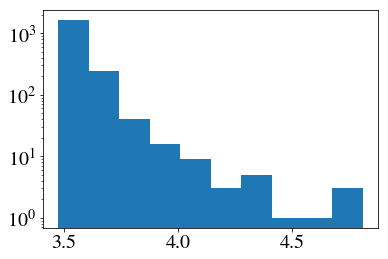

In [40]:
plt.hist(np.log10(collapse_redshifts[collapse_redshifts!=0]), log=True);

20210